# Duolingo User Activity Exploration Data Analysis

The dataset we will use in this project comes from Duolingo, which is the world's most popular platform to learn a language. You can download and check the 13 million Duolingo student learning traces from the website: <br/>
https://github.com/duolingo/halflife-regression

### General Philosophy and Steps for this Project
 - Data preparation: load all needed dependencies and packages, setup plot style
 - Data Import: load data to pandas dataframe and check
 - Post questions: propose hypothesis based on intuition
 - Visualization: Test intuition and hypothesis using python visualization packages, such as Matplotlib.

## Duolingo exploratory data analysis 

In [1]:
# Import all dependencies we need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import datetime as dt
import seaborn as sns
%matplotlib inline 

In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


### Import data 

In [5]:
# Since this dataset is 1.3G and we only take a look of first 1000000 rows #
df = pd.read_csv('D:\Document\DataScience\settles.acl16.learning_traces.13m.csv\learning_traces.13m.csv',nrows=1000000)

In [6]:
# Print out the head of our dataset
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [7]:
# Check the infomation of our data, such as columns, data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
p_recall             1000000 non-null float64
timestamp            1000000 non-null int64
delta                1000000 non-null int64
user_id              1000000 non-null object
learning_language    1000000 non-null object
ui_language          1000000 non-null object
lexeme_id            1000000 non-null object
lexeme_string        1000000 non-null object
history_seen         1000000 non-null int64
history_correct      1000000 non-null int64
session_seen         1000000 non-null int64
session_correct      1000000 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 91.6+ MB


In [8]:
# Dimension of dataset #
df.shape

(1000000, 12)

#### In EDA we are trying to answer the following questions with data visualization:

 - How many users are there from every country?
 - How many different languages are being studied
 - Are there differences between users from different coutries
 - Time series analysis 
     - temporal behaviour of users
     - when do people study?
     - how often do they study
     - timestamp
 - Predictive modelling
     - corellations of p_recall with various features    

## Numerical data

In [9]:
# list all types that only take numerical ones
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

### 1. Create a dataframe that only takes numerical data and show the head

In [10]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,6,4,2,2
1,0.5,1362076081,27649635,4,4,2,1
2,1.0,1362076081,27649635,5,4,1,1
3,0.5,1362076081,27649635,6,5,2,1
4,1.0,1362076081,27649635,4,4,1,1


### 2. Draw the histgram of df_num

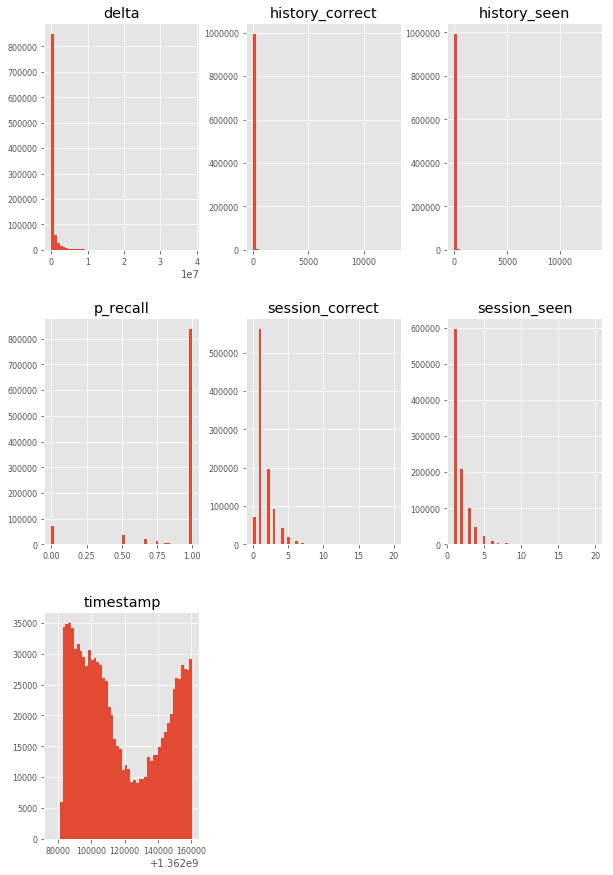

In [11]:
# plot the distribution
df_num.hist(figsize=(10, 15), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

## Feature to feature relationship

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

### 3. Compute pairwise correlation of numerical columns and draw a heatmap using seaborn plot

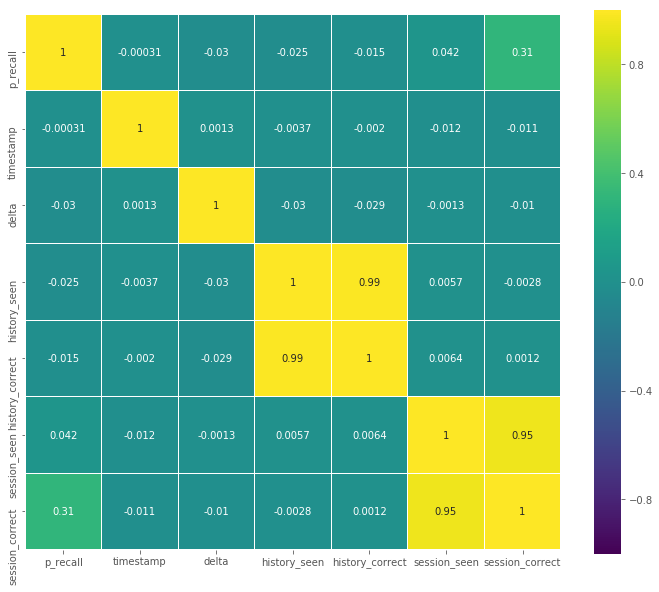

In [25]:
corr = df_num.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);

#### Notes:  We can see here histroy_seen and histroy_correct, session_seen and session_correct, they both have pretty high correlation with each other. It verifies out common sense that the more you see, the higher probability you can do correctly. 

## Categorical data - Countries

### 1. What are user interface languages

In [11]:
df['ui_language'].unique()
# en: english pt: Português es: spanish it: Italian

array(['en', 'pt', 'es', 'it'], dtype=object)

### 2. Do a value counts

In [12]:
# Do a value counts of each languages 
df['ui_language'].value_counts()

en    598123
es    298705
pt     72876
it     30296
Name: ui_language, dtype: int64

### 3. Draw a pie plot to visualize user interface language distribution with percentage on it

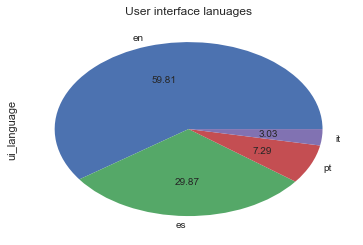

In [23]:
df['ui_language'].value_counts().plot.pie(autopct='%1.2lf')
plt.title('User interface lanuages')
plt.show()

### 4. Draw a pie plot of languages that individuals are learnging

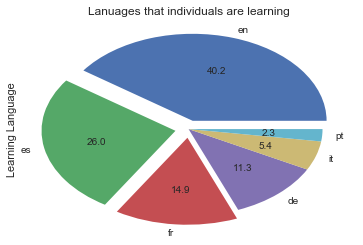

In [136]:
df['learning_language'].value_counts().plot.pie(autopct='%1.1lf',explode=[0.1,0.1,0.1,0,0,0])
plt.title('Lanuages that individuals are learning')
plt.ylabel('Learning Language')
plt.show()

### 5. Pie plot to visualize what languages being learned by people whose interface language is English

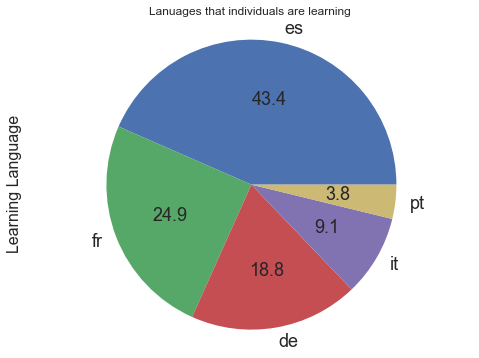

In [39]:
plt.figure(figsize=(8, 6))
df[df.ui_language == 'en']['learning_language'].value_counts().plot.pie(autopct='%1.1lf',fontsize=18)
plt.title('Lanuages that individuals are learning',fontname='Arial')
plt.axis('equal')
plt.ylabel('Learning Language',fontname='Arial',fontsize=16)
plt.show()

### 6. Let's see what languages being learned by people whose interface languages are English, Spanish, Italian, and Potuguese by subplot four pie plots

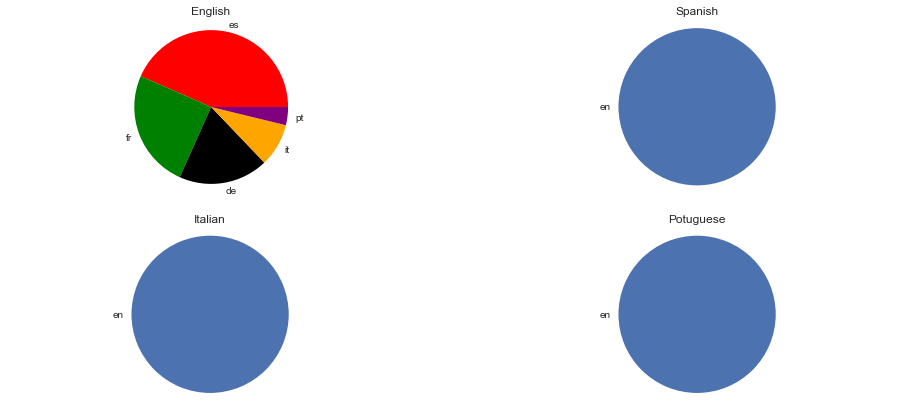

In [43]:
fig, ax = plt.subplots(2,2,figsize=[16, 7])
plt.figure(figsize=(18, 10))
ax[0][0].pie(df[df.ui_language == 'en']['learning_language'].value_counts(),
            labels=df[df.ui_language == 'en']['learning_language'].value_counts().index,
            colors=['red','green','black','orange','purple'])
ax[0][0].set_title('English')
ax[0][0].axis('equal')

ax[0][1].pie(df[df.ui_language == 'es']['learning_language'].value_counts(),
            labels=df[df.ui_language == 'es']['learning_language'].value_counts().index)
ax[0][1].set_title('Spanish')
ax[0][1].axis('equal')

ax[1][0].pie(df[df.ui_language == 'it']['learning_language'].value_counts(),
            labels=df[df.ui_language == 'it']['learning_language'].value_counts().index)
ax[1][0].set_title('Italian')
ax[1][0].axis('equal')


ax[1][1].pie(df[df.ui_language == 'pt']['learning_language'].value_counts(),
            labels=df[df.ui_language == 'pt']['learning_language'].value_counts().index)
ax[1][1].set_title('Potuguese')
ax[1][1].axis('equal')

plt.show()

**Notes**: It is quite straightforward that English speakers are learning other languages, and Spanish, Italian, Potuguses speakers are learning only English

In [27]:
df[df.ui_language == 'en']['learning_language'].value_counts().index

Index(['es', 'fr', 'de', 'it', 'pt'], dtype='object')

## Users Activity patterns

### 1. Let's see users activity in session by doing a value counts and do a summary statistics

In [44]:
df['user_id'].value_counts()

u:ia1J    2041
u:bcH_    1531
u:eMgB    1233
u:wpZ     1230
u:gp3v    1037
u:hCqJ    1033
u:im5y    1009
u:ht1n     960
u:dzpv     927
u:f-Z-     913
u:gZJc     906
u:ixca     888
u:ijBO     866
u:gWfj     834
u:haQU     824
u:feG3     823
u:faRp     823
u:h2CV     815
u:gjya     797
u:gCIc     777
u:f9KA     755
u:hv7d     743
u:ikE6     730
u:dOhF     728
u:fFed     726
u:iJkI     721
u:flac     718
u:NPs      717
u:hZJC     716
u:hdrp     702
          ... 
u:cagi       1
u:hzug       1
u:iylq       1
u:hSXV       1
u:imHm       1
u:h_Ci       1
u:iDFG       1
u:f0Lc       1
u:gESs       1
u:iHU0       1
u:iAgp       1
u:gJtI       1
u:g2m        1
u:hqaL       1
u:gabO       1
u:eXTH       1
u:hPsR       1
u:evx9       1
u:hoSY       1
u:dBwu       1
u:gw4Z       1
u:guGU       1
u:hEGg       1
u:h4DP       1
u:iBwl       1
u:gLCM       1
u:bcO5       1
u:eMaJ       1
u:F2         1
u:L5P        1
Name: user_id, Length: 20204, dtype: int64

In [45]:
user_activity = df['user_id'].value_counts()
user_activity.describe()

count    20204.000000
mean        49.495149
std         74.911279
min          1.000000
25%          8.000000
50%         26.000000
75%         59.000000
max       2041.000000
Name: user_id, dtype: float64

### 2. Compute the duration of dataset

In [51]:
duration = df.groupby('user_id').apply(lambda x: (x['timestamp'].max() - x['timestamp'].min())/3600.0).to_frame()

In [69]:
activity_df = df['user_id'].value_counts().to_frame().merge(duration, how = 'inner', left_index = True, right_index = True, copy = False)
activity_df = activity_df.reset_index()
activity_df.columns = ['user_id','entries', 'duration']

In [75]:
df = df.merge(activity_df,how="left",on='user_id')

In [90]:
df['activity'] = df[['entries','duration']].apply(lambda x:x[0]/x[1] if x[1]!=0 else 0,axis=1)

In [78]:
# User's daily activity hour
duration = (df.timestamp.max() - df.timestamp.min())/3600.0
print('Duration of dataset is ' + str(duration) + 'hours')

Duration of dataset is 23.5005555556hours


## Boxplots

### 3. Compare activity levels for people with different 4 user interface languages by drawing boxplots

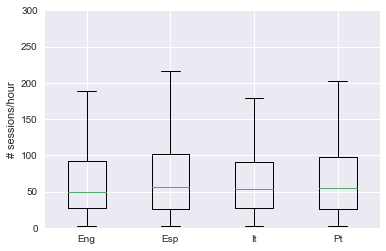

In [99]:
plt.figure()
plt.boxplot([df[df.ui_language == 'en']['activity'].value_counts(),
            df[df.ui_language == 'es']['activity'].value_counts(),
            df[df.ui_language == 'it']['activity'].value_counts(),
            df[df.ui_language == 'pt']['activity'].value_counts()])
plt.xticks([1,2,3,4],['Eng','Esp','It','Pt'])
plt.ylabel('# sessions/hour')
plt.ylim(0,300)
plt.show()

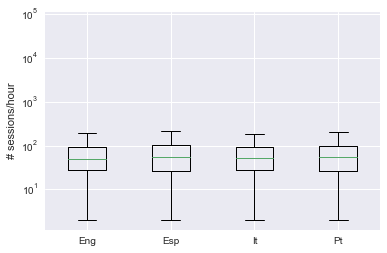

In [100]:
plt.figure()
plt.boxplot([df[df.ui_language == 'en']['activity'].value_counts(),
            df[df.ui_language == 'es']['activity'].value_counts(),
            df[df.ui_language == 'it']['activity'].value_counts(),
            df[df.ui_language == 'pt']['activity'].value_counts()])
plt.xticks([1,2,3,4],['Eng','Esp','It','Pt'])
plt.ylabel('# sessions/hour')
plt.yscale('log')
plt.show()

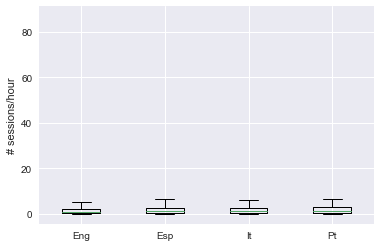

In [79]:
plt.figure()
plt.boxplot([df[df.ui_language == 'en']['user_id'].value_counts()/duration,
            df[df.ui_language == 'es']['user_id'].value_counts()/duration,
            df[df.ui_language == 'it']['user_id'].value_counts()/duration,
            df[df.ui_language == 'pt']['user_id'].value_counts()/duration])
plt.xticks([1,2,3,4],['Eng','Esp','It','Pt'])
plt.ylabel('# sessions/hour')
plt.show()

### 4. Do the same thing but setting ylim to 0-10, which plot would be seen more clearly

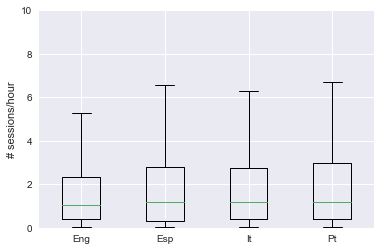

In [81]:
plt.figure()
plt.boxplot([df[df.ui_language == 'en']['user_id'].value_counts()/duration,
            df[df.ui_language == 'es']['user_id'].value_counts()/duration,
            df[df.ui_language == 'it']['user_id'].value_counts()/duration,
            df[df.ui_language == 'pt']['user_id'].value_counts()/duration])
plt.xticks([1,2,3,4],['Eng','Esp','It','Pt'])
plt.ylabel('# sessions/hour')
plt.ylim(0,10)
plt.show()

**Notes**: The user activity distribution by different interface language is quite similar and the median across different languages is quite similar as well. 

### 5. Another way to zoom in instead of setting ylim is to take a log scale on the boxplot

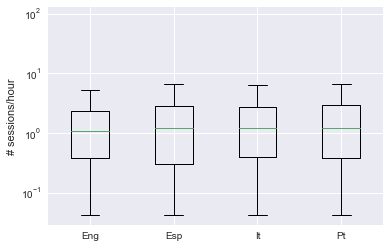

In [82]:
plt.figure()
plt.boxplot([df[df.ui_language == 'en']['user_id'].value_counts()/duration,
            df[df.ui_language == 'es']['user_id'].value_counts()/duration,
            df[df.ui_language == 'it']['user_id'].value_counts()/duration,
            df[df.ui_language == 'pt']['user_id'].value_counts()/duration])
plt.xticks([1,2,3,4],['Eng','Esp','It','Pt'])
plt.ylabel('# sessions/hour')
plt.yscale('log')
plt.show()

## Regression and predictive tasks

In [101]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,entries,duration,activity
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,31,1.752222,17.69182
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,31,1.752222,17.69182
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,31,1.752222,17.69182
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,31,1.752222,17.69182
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,31,1.752222,17.69182


**Notes**: With common sense, we know that the more time spent on courses, the better the score will be. So let's draw the scatter plot to see whether or not our common sense is correct. 

### 1. Scatter plot the relation between session_seen and p_recall

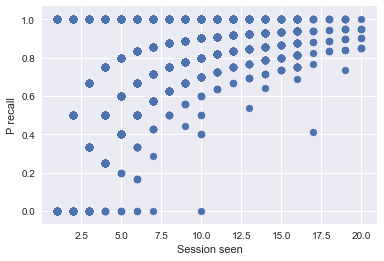

In [102]:
plt.figure()
plt.scatter(df.session_seen, df.p_recall)
plt.xlabel('Session seen')
plt.ylabel('P recall')
plt.show()

### 2. Scatter plot the same distribution with log scale. 

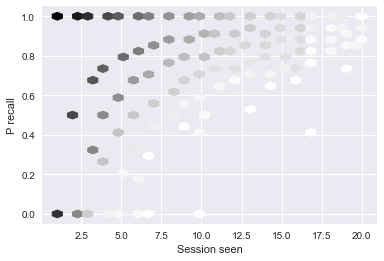

In [105]:
plt.figure()
plt.hexbin(df.session_seen, df.p_recall,gridsize=30,bins='log', mincnt=1)
plt.xlabel('Session seen')
plt.ylabel('P recall')
plt.show()

### 3. Goupby session_seen and take aveage on it, and scatter plot relation with p_recall

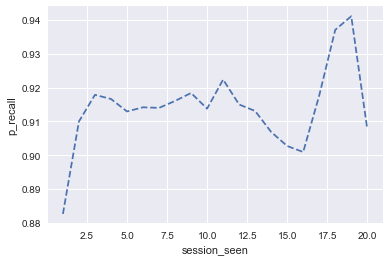

In [106]:
plt.plot(df.groupby('session_seen').mean()['p_recall'],'x--')
plt.xlabel('session_seen')
plt.ylabel('p_recall')
plt.show()

### 4. Goupby history_seen and take aveage on it, and scatter plot relation with p_recall

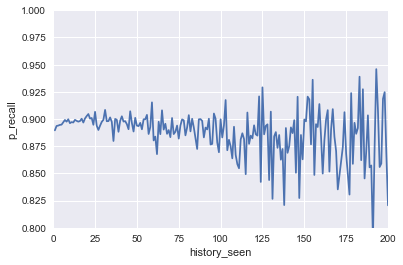

In [108]:
plt.plot(df.groupby('history_seen').mean()['p_recall'])
plt.xlim(0,200)
plt.ylim(0.8,1)
plt.xlabel('history_seen')
plt.ylabel('p_recall')
plt.show()

### 5. Scatter plot the relation history_seen and p_recall when session_seen is greater than 5

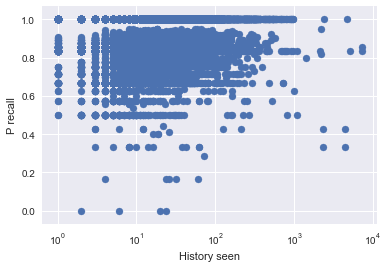

In [109]:
plt.figure()
plt.scatter(df[df.session_seen > 5].history_seen, df[df.session_seen > 5].p_recall)
plt.xlabel('History seen')
plt.ylabel('P recall')
plt.xscale('log')
plt.show()

### 6. Hexbin plot the relation between history_seen and p_recal with log scale

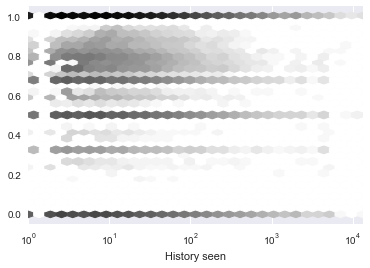

In [110]:
plt.figure()
plt.hexbin(df.history_seen, df.p_recall,xscale='log',gridsize=30,bins='log')
plt.xlabel('History seen')
plt.xscale('log')
plt.show()

### 7. Create a dataframe with user_id and user_activity based on user_id index

#### In order to see user_activity and other features relationship, we add user_activity column here for later visualization

In [112]:
a = pd.DataFrame()
a['user_id'] = user_activity.index
a['user_activity'] = user_activity.values
a.head()

,user_id,user_activity
0,u:ia1J,2041
1,u:bcH_,1531
2,u:eMgB,1233
3,u:wpZ,1230
4,u:gp3v,1037


### 8. Merge dataframe onto original dataframe

In [113]:
df = df.merge(a,on='user_id',how='inner')
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,entries,duration,activity,user_activity
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,31,1.752222,17.69182,31
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,31,1.752222,17.69182,31
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,31,1.752222,17.69182,31
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,31,1.752222,17.69182,31
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,31,1.752222,17.69182,31


### 9. Get summary statistics of p_recall when user_activity is less than 8 and greater than 59 respectively

In [114]:
print(df[df.user_activity < 8]['p_recall'].describe())
print(df[df.user_activity > 59]['p_recall'].describe())

count    21922.000000
mean         0.902981
std          0.192375
min          0.000000
25%          0.833333
50%          1.000000
75%          1.000000
max          1.000000
Name: p_recall, dtype: float64
count    691724.000000
mean          0.894502
std           0.281582
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: p_recall, dtype: float64


### 10. Hexbin plot the relation between delta and p_recall with log scale

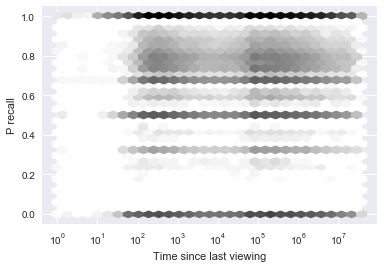

In [115]:
plt.hexbin(df.delta, df.p_recall,gridsize=30,xscale='log',bins='log')
plt.xlabel('Time since last viewing')
plt.ylabel('P recall')
plt.show()

### 11. Scatter plot relation between user_activity and delta

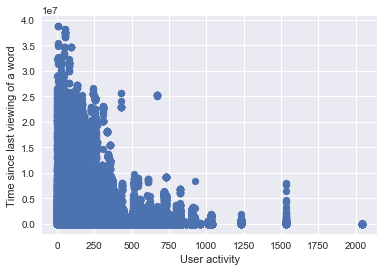

In [116]:
plt.scatter(df.user_activity, df.delta)
plt.xlabel('User activity')
plt.ylabel('Time since last viewing of a word')
plt.show()

### 12. Hexbin plot the relation between user_activity and delta with log scale

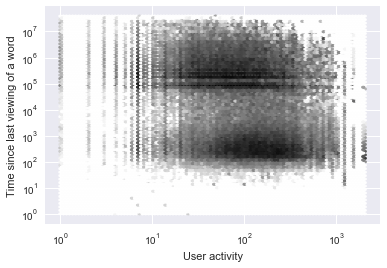

In [117]:
plt.hexbin(df.user_activity, df.delta,xscale='log',yscale='log',bins='log')
plt.xlabel('User activity')
plt.ylabel('Time since last viewing of a word')
plt.show()

## Temporal patterns and Time Series

### 1. Plot the general all users activity pattern to see what time people are pretty active during a day

In [24]:
np.round((df.timestamp - df.timestamp.min())/60.0,0).value_counts()

146.0     1624
436.0     1557
211.0     1551
199.0     1528
176.0     1507
393.0     1471
282.0     1463
207.0     1462
151.0     1460
195.0     1448
1390.0    1436
166.0     1435
170.0     1429
159.0     1425
138.0     1424
132.0     1418
278.0     1413
134.0     1413
131.0     1409
1408.0    1406
205.0     1405
154.0     1399
234.0     1391
244.0     1388
171.0     1386
283.0     1384
376.0     1376
137.0     1361
202.0     1360
128.0     1360
          ... 
929.0      229
828.0      225
788.0      224
849.0      221
720.0      203
850.0      202
837.0      202
877.0      195
803.0      195
944.0      193
723.0      191
825.0      191
1024.0     188
937.0      187
907.0      187
898.0      186
719.0      179
871.0      175
798.0      175
791.0      171
892.0      170
846.0      166
107.0      118
103.0       31
99.0         8
105.0        7
0.0          7
104.0        6
102.0        4
101.0        1
Name: timestamp, Length: 1311, dtype: int64

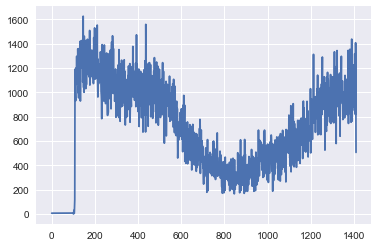

In [118]:
plt.plot(np.round((df.timestamp - df.timestamp.min())/60.0,0).value_counts().sort_index())

### 2. Visualize each interface language users daily activity pattern onto a single plot in the first day. 

In [ ]:
# We can use datetime library to convert timestamp to actual datetime
dt.datetime.fromtimestamp(df.timestamp.min())

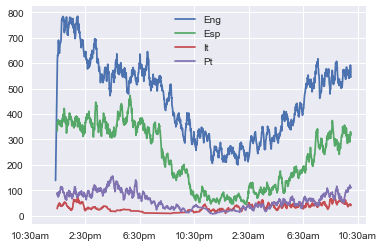

In [127]:
win = 10 ## set the window as 10 min
hours = 60
plt.plot(pd.Series(np.round((df[df.ui_language == 'en'].timestamp - df.timestamp.min())/60.0,0).value_counts().sort_index()).rolling(window=win).mean())
plt.plot(pd.Series(np.round((df[df.ui_language == 'es'].timestamp - df.timestamp.min())/60.0,0).value_counts().sort_index()).rolling(window=win).mean())
plt.plot(pd.Series(np.round((df[df.ui_language == 'it'].timestamp - df.timestamp.min())/60.0,0).value_counts().sort_index()).rolling(window=win).mean())
plt.plot(pd.Series(np.round((df[df.ui_language == 'pt'].timestamp - df.timestamp.min())/60.0,0).value_counts().sort_index()).rolling(window=win).mean())
plt.legend(['Eng','Esp','It','Pt'])
plt.xticks([0,4*hours,8*hours,12*hours,16*hours,20*hours,24*hours],['10:30am','2:30pm','6:30pm','10:30pm','2:30am','6:30am','10:30am'])
plt.show()

## Summary

* English speaking users are the most.Other popular user speaking language inclues Spanish, Portuguese and Italy.
* Emglish spkeaking users are leanrning languages such as Spanish, Portuguese, French and Italy. All other users are learning English.
* The user activity distribution by different interface language is quite similar and the median across different languages is quite similar as well. 
* In gennerally, the higher the session_seen and history_seen are, the higher the p_recall is. The conclusion can be seen from average p_recall is increasing as session_seen increase.
* Time since last time view does show obvious relationship with p_recall.
* Users are prone to study in the morning and afternoon which are consistant with school hours.

## Feature Engineering

* For numeric features, process data with standarization and normalization.Create bins.
* For categorial features, create dummies using One-hot encoding.
* Create new features like user_activity_mean,Days_of_Month,Days_of_Week,Days_of_Year
* Feture selection: rank feature importance. Possiblly remove highly correlated features:  history_correct, session_correct.

## Model Development

* Try different modeling: Lieaner regression, Polynomial Regression, ElasticNet Regression,Decision Tree, SVM, xGBOOST.
* Use MSE to evaluate model.
* Use cross validation to select model.
* We can build a recomendation system based on different user preference and user activity patterns.